# Funciones Extra

In [85]:
# Plot polynomials

def plotPoly(polys, name, L, R):
    x = var('x')
    a = plot([],figsize=(8, 8),title=name)
    classic_colors = ['crimson', 'blue', 'green', 'orange', 'purple', 'brown', 'red', 'yellow']
    n = len(polys)
    assert(n > 0)
    assert(len(L) == n and len(R) == n)
    for i in range(n):
        a += plot(polys[i], x, L[i], R[i], color=colors.keys()[i])
    show(a)

In [86]:
# Parse polynomial with coefficients

def parsePoly(poly):
    var('x')
    ans = 0
    mono = 1;
    for i in range(len(poly.list())):
        ans += poly.list()[i] * mono
        mono *= x
    return ans

In [87]:
# Plot polynomials with interpolation method "interpolation"

def plotPolylines(groups, name, interpolation):
    polynomials = []
    L = []
    R = []
    for points in groups:
        p = parsePoly(interpolation(points))
        polynomials.append(p)
        minimum = points[0][0]
        maximum = points[0][0]
        for i in range(1, len(points)):
            if points[i][0] < minimum: minimum = points[i][0]
            if points[i][0] > maximum: maximum = points[i][0]
        L.append(minimum)
        R.append(maximum)
    plotPoly(polynomials, name, L, R)

# Algoritmos para Ajuste Spline Lineal

In [88]:
def multiply(A, B):
    n = len(A)
    m = len(A[0])
    k = len(B[0])
    assert(m == len(B))
    C = [[0 for i in range(k)] for i in range(n)]
    for i in range(n):
        for j in range(k):
            for p in range(m):
                C[i][j] += A[i][p] * B[p][j]
    return C

In [89]:
def Gaussian(a, b):
    n = len(a)
    assert(n > 1)
    m = len(a[0])
    assert(m > 1)
    assert(len(b) == n)
    EPS = 1e-15
    ans = [None for _ in range(m)]
    where = [-1 for _ in range(m)]
    row = 0
    col = 0
    while(row < n and col < m):
        sel = row
        for i in range(row, n):
            if abs(a[i][col]) > abs(a[sel][col]):
                sel = i
        if abs(a[sel][col]) < EPS:
            continue
        for i in range(col, m):
            a[sel][i], a[row][i] = a[row][i], a[sel][i]
        b[sel], b[row] = b[row], b[sel]
        where[col] = row
        for i in range(n):
            if i == row: continue
            c = a[i][col] / a[row][col]
            for j in range(col, m):
                a[i][j] -= a[row][j] * c
            b[i] -= b[row] * c
        row += 1
        col += 1
    for i in range(m):
        if where[i] == -1: continue
        ans[i] = b[where[i]] / a[where[i]][i]
    for i in range(n):
        s = 0
        for j in range(m):
            s += a[i][j] * ans[j]
        if abs(s - b[i]) > EPS:
            for k in range(m):
                ans[k] = None
            return ans
    return ans

In [111]:
def AjusteSplineLineal(points, xp):
    n = len(points)
    Y = [[points[i][1]] for i in range(n)]
    M = [[1, points[i][0], unit_step(points[i][0] - xp - 1e-15)] for i in range(n)]
    MT = [[1 for i in range(n)], [points[i][0] for i in range(n)], [unit_step(points[i][0] - xp - 1e-15) for i in range(n)]]
    a = multiply(MT, M)
    c = multiply(MT, Y)
    b = []
    for i in range(3):
        b.append(c[i][0])
    A = Gaussian(a, b)
    var('x')
    return A[0] + A[1] * x + A[2] * unit_step(x - xp)

# Ejemplo

0.0227875000000004*x + 5.76749999999977*unit_step(x - 1100) + 351.000000000000


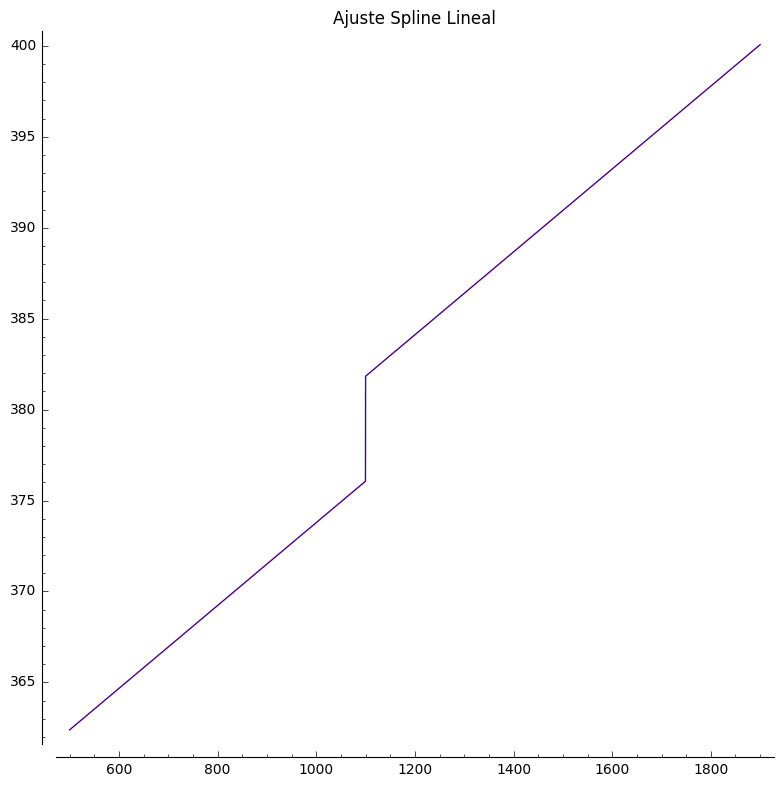

In [113]:
points = [(500, 365), (700, 361.6), (900, 370.64), (1100, 379.68), (1300, 384.46), (1500, 395.5), (1700, 395.95), (1900, 397)]

P = AjusteSplineLineal(points, 1100)

print(P)

plotPoly([P], "Ajuste Spline Lineal", [500], [1900])